# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import get_weather_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# print(cities)
weather_api_key = get_weather_key()


In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['city']['coord']['lat']
        city_lng = city_weather['city']['coord']['lon']
        city_max_temp = city_weather['list'][0]['main']['temp_max']
        city_humidity = city_weather['list'][0]['main']['humidity']
        city_clouds = city_weather['list'][0]['clouds']['all']
        city_wind = city_weather['list'][0]['wind']['speed']
        city_country = city_weather['city']['country']
        city_date = city_weather['list'][0]['dt_txt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | kourou
Processing Record 3 of Set 1 | klyuchi
Processing Record 4 of Set 1 | taksimo
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | keflavik
Processing Record 7 of Set 1 | narok
Processing Record 8 of Set 1 | wailua homesteads
Processing Record 9 of Set 1 | alofi
Processing Record 10 of Set 1 | taiohae
City not found. Skipping...
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | bandarbeyla
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | sitia
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | tromso
Processing Record 17 of Set 1 | yangor
City not found. Skipping...
Processing Record 18 of Set 1 | malabar
Processing Record 19 of Set 1 | san jose village
City not found. Skipping...
Processing Record 20 of Set 1 | bethel
Processing Record 21 o

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,292.54,94,100,0.34,US,2023-07-10 03:00:00
1,kourou,5.1552,-52.6478,298.52,89,5,3.61,GF,2023-07-10 03:00:00
2,klyuchi,52.2667,79.1667,296.22,45,39,3.36,RU,2023-07-10 03:00:00
3,taksimo,56.3444,114.8794,300.34,43,87,1.87,RU,2023-07-10 03:00:00
4,port-aux-francais,-49.3500,70.2167,275.58,61,100,9.66,TF,2023-07-10 03:00:00


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,292.54,94,100,0.34,US,2023-07-10 03:00:00
1,kourou,5.1552,-52.6478,298.52,89,5,3.61,GF,2023-07-10 03:00:00
2,klyuchi,52.2667,79.1667,296.22,45,39,3.36,RU,2023-07-10 03:00:00
3,taksimo,56.3444,114.8794,300.34,43,87,1.87,RU,2023-07-10 03:00:00
4,port-aux-francais,-49.3500,70.2167,275.58,61,100,9.66,TF,2023-07-10 03:00:00


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

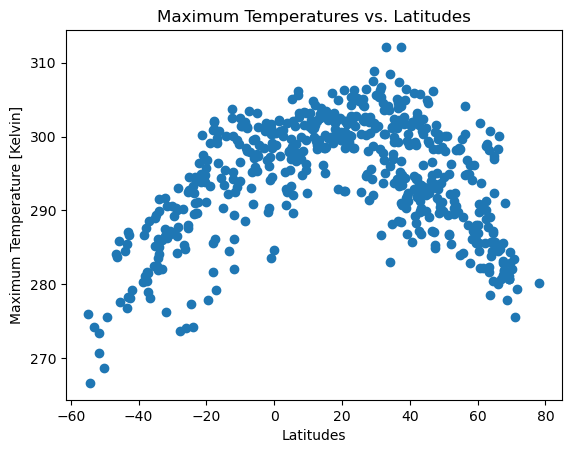

In [13]:
# Build scatter plot for latitude vs. temperature
fig1 = plt.figure()
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])


# Incorporate the other graph properties
plt.title('Maximum Temperatures vs. Latitudes')
plt.xlabel('Latitudes')
plt.ylabel('Maximum Temperature [Kelvin]')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

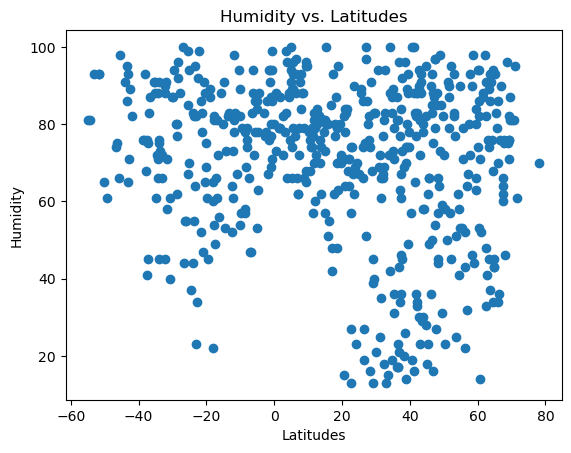

In [15]:
# Build the scatter plots for latitude vs. humidity
fig2 = plt.figure()
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title('Humidity vs. Latitudes')
plt.xlabel('Latitudes')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

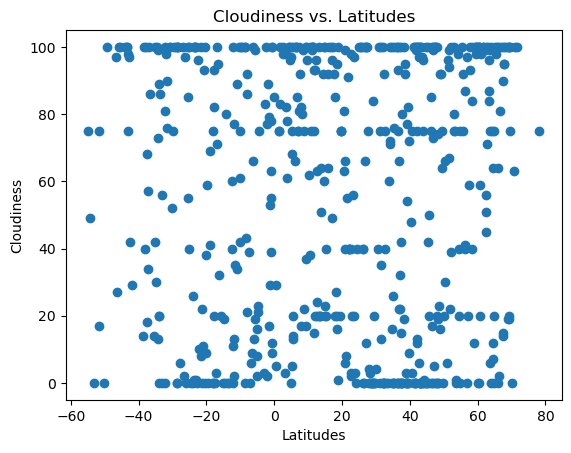

In [17]:
# Build the scatter plots for latitude vs. cloudiness
fig3 = plt.figure()
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title('Cloudiness vs. Latitudes')
plt.xlabel('Latitudes')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

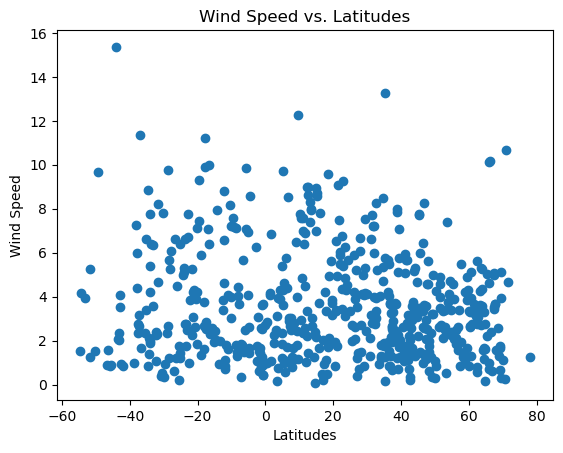

In [25]:
# Build the scatter plots for latitude vs. wind speed
fig4 = plt.figure()
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title('Wind Speed vs. Latitudes')
plt.xlabel('Latitudes')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [35]:
# Define a function to create Linear Regression plots
def prep_linear_regr(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

    regr = x * slope + intercept

    return x, regr, rvalue, slope, intercept

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,292.54,94,100,0.34,US,2023-07-10 03:00:00
1,kourou,5.1552,-52.6478,298.52,89,5,3.61,GF,2023-07-10 03:00:00
2,klyuchi,52.2667,79.1667,296.22,45,39,3.36,RU,2023-07-10 03:00:00
3,taksimo,56.3444,114.8794,300.34,43,87,1.87,RU,2023-07-10 03:00:00
5,keflavik,64.0049,-22.5624,283.85,93,0,4.36,IS,2023-07-10 03:00:00


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,port-aux-francais,-49.3500,70.2167,275.58,61,100,9.66,TF,2023-07-10 03:00:00
6,narok,-1.0783,35.8601,283.64,87,55,1.24,KE,2023-07-10 03:00:00
8,alofi,-19.0595,-169.9187,299.09,89,41,5.88,NU,2023-07-10 03:00:00
9,waitangi,-43.9535,-176.5597,284.47,91,100,15.36,NZ,2023-07-10 03:00:00
11,avarua,-21.2078,-159.7750,300.18,83,0,3.09,CK,2023-07-10 03:00:00


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:  -0.6050675454393047
The model's formula is: y =  -0.21986821354562192 x +  303.9239390493906


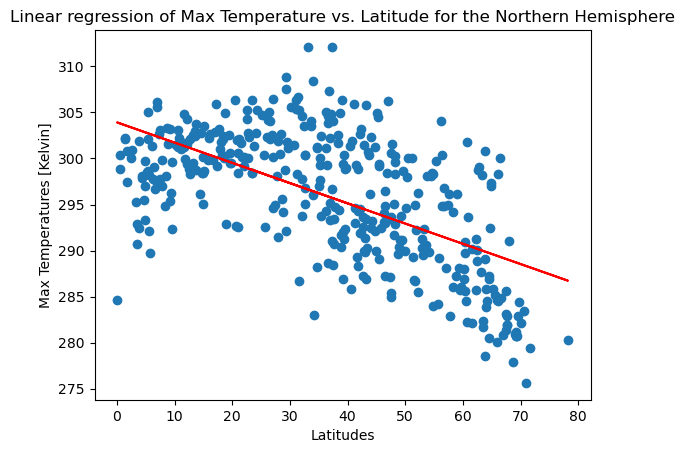

In [36]:
# Linear regression on Northern Hemisphere
northern_hemi_x, northern_hemi_regr, northern_hemi_rvalue, northern_hemi_slope, northern_hemi_intercept = prep_linear_regr(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

fig5 = plt.figure()

# normal scatter
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

# linear regression
plt.plot(northern_hemi_x, northern_hemi_regr, 'r')

print('The r-value is: ', northern_hemi_rvalue)
print("The model's formula is: y = ", northern_hemi_slope, "x + ", northern_hemi_intercept)

# plot labels
plt.title('Linear regression of Max Temperature vs. Latitude for the Northern Hemisphere')
plt.xlabel('Latitudes')
plt.ylabel('Max Temperatures [Kelvin]')

plt.show()

The r-value is:  0.7632137256428693
The model's formula is: y =  0.44996671016139805 x +  300.4623166660984


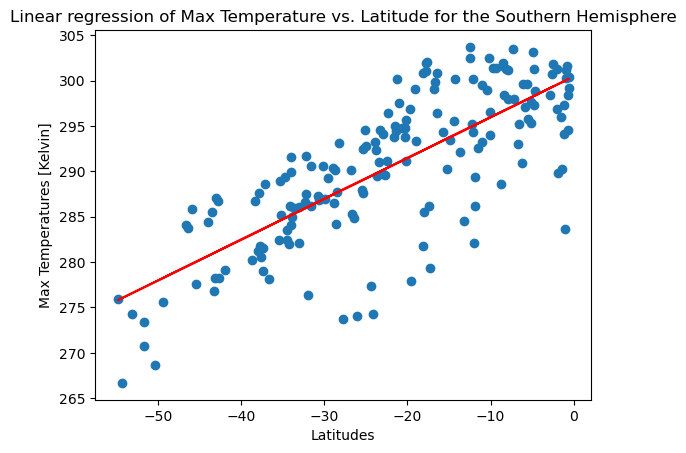

In [37]:
# Linear regression on Southern Hemisphere
southern_hemi_x, southern_hemi_regr, southern_hemi_rvalue, southern_hemi_slope, southern_hemi_intercept = prep_linear_regr(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

fig6 = plt.figure()

# normal scatter
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

# linear regression
plt.plot(southern_hemi_x, southern_hemi_regr, 'r')

print('The r-value is: ', southern_hemi_rvalue)
print("The model's formula is: y = ", southern_hemi_slope, "x + ", southern_hemi_intercept)

# plot labels
plt.title('Linear regression of Max Temperature vs. Latitude for the Southern Hemisphere')
plt.xlabel('Latitudes')
plt.ylabel('Max Temperatures [Kelvin]')

plt.show()

**Discussion about the linear relationship:** The northern graph contains a linear relationship, however, the relationship is slightly more quadratic.  The temperatures range from around 275 to around 312 Kelvin, with temperatures decreasing as latitudes increase.  The southern graph has a better linear relationship, with temperature values ranging from around 266 to around 304.  With the southern hemisphere, temperatures increase as latitudes increase.

### Humidity vs. Latitude Linear Regression Plot

The r-value is:  -0.13413809856021264
The model's formula is: y =  -0.15188144956920074 x +  74.31370322646298


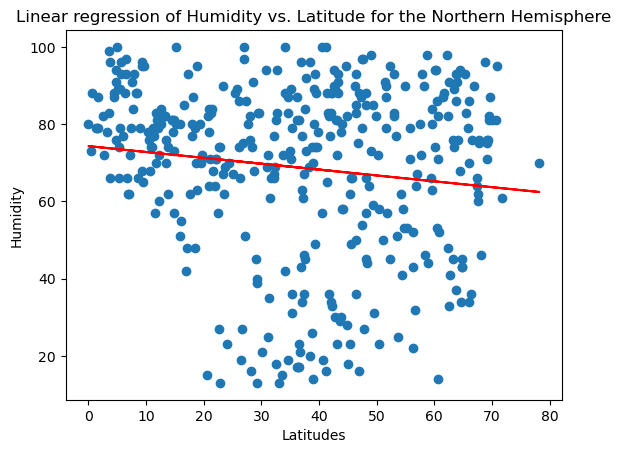

In [38]:
# Northern Hemisphere
northern_hemi_x, northern_hemi_regr, northern_hemi_rvalue, northern_hemi_slope, northern_hemi_intercept = prep_linear_regr(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

fig7 = plt.figure()

# normal scatter
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

# linear regression
plt.plot(northern_hemi_x, northern_hemi_regr, 'r')

print('The r-value is: ', northern_hemi_rvalue)
print("The model's formula is: y = ", northern_hemi_slope, "x + ", northern_hemi_intercept)

# plot labels
plt.title('Linear regression of Humidity vs. Latitude for the Northern Hemisphere')
plt.xlabel('Latitudes')
plt.ylabel('Humidity')

plt.show()

The r-value is:  -0.02386656045503294
The model's formula is: y =  -0.027464469670086415 x +  74.10852575124845


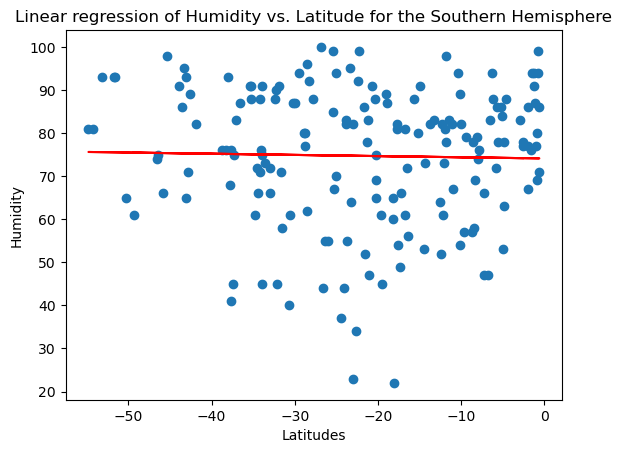

In [39]:
# Southern Hemisphere
southern_hemi_x, southern_hemi_regr, southern_hemi_rvalue, southern_hemi_slope, southern_hemi_intercept = prep_linear_regr(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

fig8 = plt.figure()

# normal scatter
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

# linear regression
plt.plot(southern_hemi_x, southern_hemi_regr, 'r')

print('The r-value is: ', southern_hemi_rvalue)
print("The model's formula is: y = ", southern_hemi_slope, "x + ", southern_hemi_intercept)

# plot labels
plt.title('Linear regression of Humidity vs. Latitude for the Southern Hemisphere')
plt.xlabel('Latitudes')
plt.ylabel('Humidity')

plt.show()

**Discussion about the linear relationship:** For both graphs, there are a poor linear correlations.  With the northern graph, it seems that there are higher humidities for lower latitudes.  Both hemispheres have most of their humidities above 50.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:  -0.008079314644057865
The model's formula is: y =  -0.016443734474934385 x +  55.88898166839142


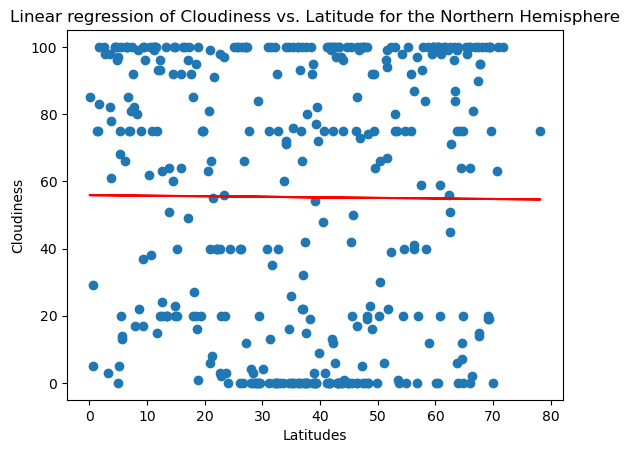

In [40]:
# Northern Hemisphere
orthern_hemi_x, northern_hemi_regr, northern_hemi_rvalue, northern_hemi_slope, northern_hemi_intercept = prep_linear_regr(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

fig9 = plt.figure()

# normal scatter
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

# linear regression
plt.plot(northern_hemi_x, northern_hemi_regr, 'r')

print('The r-value is: ', northern_hemi_rvalue)
print("The model's formula is: y = ", northern_hemi_slope, "x + ", northern_hemi_intercept)

# plot labels
plt.title('Linear regression of Cloudiness vs. Latitude for the Northern Hemisphere')
plt.xlabel('Latitudes')
plt.ylabel('Cloudiness')

plt.show()

The r-value is:  -0.1479699034909805
The model's formula is: y =  -0.41648957967503797 x +  43.67318922884494


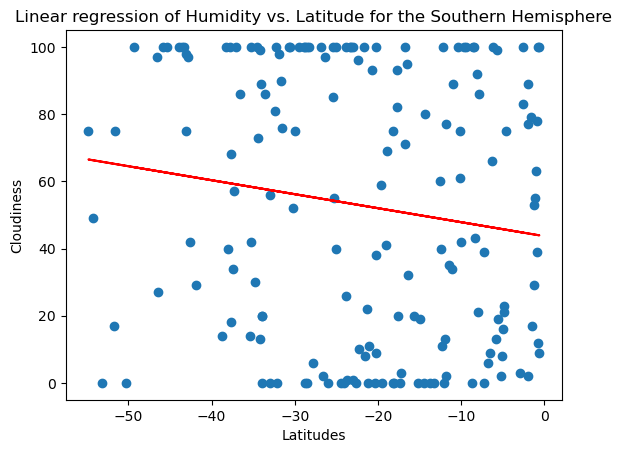

In [41]:
# Southern Hemisphere
southern_hemi_x, southern_hemi_regr, southern_hemi_rvalue, southern_hemi_slope, southern_hemi_intercept = prep_linear_regr(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

fig10 = plt.figure()

# normal scatter
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

# linear regression
plt.plot(southern_hemi_x, southern_hemi_regr, 'r')

print('The r-value is: ', southern_hemi_rvalue)
print("The model's formula is: y = ", southern_hemi_slope, "x + ", southern_hemi_intercept)

# plot labels
plt.title('Linear regression of Humidity vs. Latitude for the Southern Hemisphere')
plt.xlabel('Latitudes')
plt.ylabel('Cloudiness')

plt.show()

**Discussion about the linear relationship:** Similar to the humidity graphs, both hemispheres cloudiness graph's have poor linear corrleations.  It is also interesting to note that for both graphs there are clusters of cities with either 0 or 100 cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:  -0.14606279296196026
The model's formula is: y =  -0.017203431279213276 x +  4.128035050283424


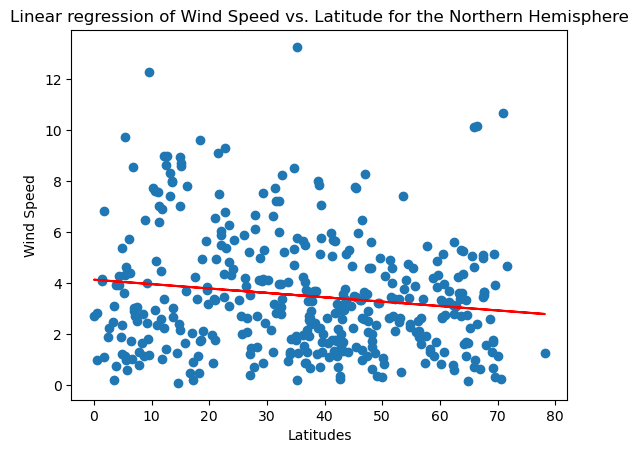

In [42]:
# Northern Hemisphere
orthern_hemi_x, northern_hemi_regr, northern_hemi_rvalue, northern_hemi_slope, northern_hemi_intercept = prep_linear_regr(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

fig11 = plt.figure()

# normal scatter
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

# linear regression
plt.plot(northern_hemi_x, northern_hemi_regr, 'r')

print('The r-value is: ', northern_hemi_rvalue)
print("The model's formula is: y = ", northern_hemi_slope, "x + ", northern_hemi_intercept)

# plot labels
plt.title('Linear regression of Wind Speed vs. Latitude for the Northern Hemisphere')
plt.xlabel('Latitudes')
plt.ylabel('Wind Speed')

plt.show()

The r-value is:  -0.05486285769267721
The model's formula is: y =  -0.010918794121403069 x +  3.479735357632111


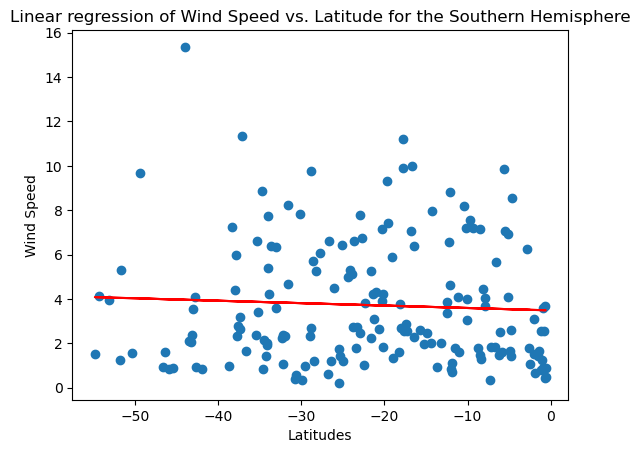

In [43]:
# Southern Hemisphere
southern_hemi_x, southern_hemi_regr, southern_hemi_rvalue, southern_hemi_slope, southern_hemi_intercept = prep_linear_regr(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

fig13 = plt.figure()

# normal scatter
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

# linear regression
plt.plot(southern_hemi_x, southern_hemi_regr, 'r')

print('The r-value is: ', southern_hemi_rvalue)
print("The model's formula is: y = ", southern_hemi_slope, "x + ", southern_hemi_intercept)

# plot labels
plt.title('Linear regression of Wind Speed vs. Latitude for the Southern Hemisphere')
plt.xlabel('Latitudes')
plt.ylabel('Wind Speed')

plt.show()

**Discussion about the linear relationship:** For both graphs, the majority of cities have low wind speeds.  The northern hemisphere graph has a downward trending linear relationship, where wind speeds become slightly lower as the latitudes increase.  The southern hemisphere also has a slightly downward trending linear relationship, as, similar to the northern hemisphere, the wind speeds slightly decrease as the latitudes increase.